<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span><ul class="toc-item"><li><span><a href="#ETL" data-toc-modified-id="ETL-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ETL</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Test</a></span></li></ul></li><li><span><a href="#Training-Set-Univariate-Analysis" data-toc-modified-id="Training-Set-Univariate-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Training Set Univariate Analysis</a></span></li><li><span><a href="#Multivariate-analysis" data-toc-modified-id="Multivariate-analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Multivariate analysis</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-relationships-in-greater-detail" data-toc-modified-id="Exploring-the-relationships-in-greater-detail-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Exploring the relationships in greater detail</a></span></li></ul></li><li><span><a href="#Scikit-learn-stuff" data-toc-modified-id="Scikit-learn-stuff-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Scikit-learn stuff</a></span></li></ul></li></ul></div>

In [2]:
import statsmodels.api as sm

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

# Problem Statement
In this problem we are given a dataset to predict the likelihood of someone surviving on the titanic. The result is a binary variable of either surviving or not. 

Measurement of success: Predicting on the test dataset correctly whether the person survived the Titanic or not

We have 9 variables:
- Pclass: A proxy for socio-economic status (1st = Upper, 2nd = Middle, 3rd = Lower)
- Name
- Sex
- Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- Ticket: Looks like some sort of letter number combination? Not sure if it'll be useful
- Fare
- Cabin: a number with NaN as null?
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


## ETL

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## EDA

### Training

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_data.shape

(891, 12)

In [9]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Datatypes are what I would expect

In [10]:
train_data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

looks like 20% of Age has some nulls, as well as 80 % of Cabin. The 2 embarked is weird.

In [11]:
train_data.duplicated().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

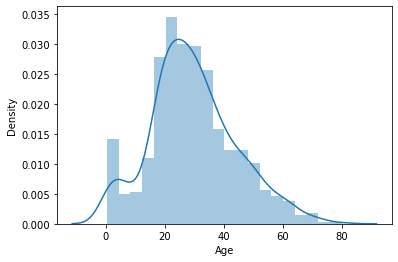

In [12]:
sns.distplot(train_data['Age'].dropna(),kde=True)

Seems like there's a significant bump in the 0 region for age

In [13]:
pd.set_option('display.max_rows',50)
train_data.loc[train_data['Age'] <= 14]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


Based on https://www.encyclopedia-titanica.org/children-on-titanic/, it looks like 14 is the age cutoff to be considered a child. This could be a field that's added to the training and test dataset. 

In [14]:
[display(train_data[x].value_counts()) if train_data[x].dtype == 'object' else np.nan for x in train_data]

Klaber, Mr. Herman                 1
Johnson, Mr. William Cahoone Jr    1
Thorne, Mrs. Gertrude Maybelle     1
Hedman, Mr. Oskar Arvid            1
Smith, Mr. Thomas                  1
                                  ..
Petroff, Mr. Nedelio               1
Dantcheff, Mr. Ristiu              1
Kelly, Mr. James                   1
Novel, Mr. Mansouer                1
Todoroff, Mr. Lalio                1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

CA. 2343      7
1601          7
347082        7
3101295       6
347088        6
             ..
364499        1
2631          1
A./5. 3235    1
14973         1
2690          1
Name: Ticket, Length: 681, dtype: int64

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
D              3
              ..
C90            1
E36            1
A6             1
B73            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

[nan, nan, nan, None, None, nan, nan, nan, None, nan, None, None]

Looks like Name and Ticket and Cabin are kinda useless in their current state. We know that cabin has nulls, so maybe the nulls means that they weren't assigned a cabin? How many of these nulls are in test? Looks like a decent number as well. 80% are null. Perhaps we could make a variable that says whether it's cabin or no cabin

In [15]:
train_data['Child'] = train_data['Age'] <= 14
train_data['Has_Cabin'] = [1 if pd.isnull(x) != True else 0 for x in train_data['Cabin']]

I'm wondering if there is a way to use the name data. Looks like there is a way to get their title out from the name using Regex. It seems like it's always between the comma and the period. It seems like there's a Mr., Mrs., Master, and Miss

In [16]:
titles = train_data['Name'].str.findall(r', [\w\s]*\.')

train_data['Title'] = [re.findall('[\w\s]*',x[0])[1] for x in titles]

In [17]:
train_data.groupby('Title',as_index=False).agg({'Survived':'mean','Age':'max','PassengerId':'count'})

,Title,Survived,Age,PassengerId
0,Capt,0.000000,70.0,1
1,Col,0.500000,60.0,2
2,Don,0.000000,40.0,1
3,Dr,0.428571,54.0,7
4,Jonkheer,0.000000,38.0,1
5,Lady,1.000000,48.0,1
6,Major,0.500000,52.0,2
7,Master,0.575000,12.0,40
8,Miss,0.697802,63.0,182
9,Mlle,1.000000,24.0,2


Looking at the title list, it might not be all that helpful. Mrs. and Miss definitely can tell us if they're married, and Master seems to only be counted for males under 12? Maybe this means that children were only considered under 12? Also, I think I will make all of the <10 ones 'Other'. Hmm maybe there's some help in last names too

In [18]:
train_data_title_grouped = train_data.groupby('Title',as_index=False).agg({'Survived':'mean','Age':'max','PassengerId':'count'})
high_titles = train_data_title_grouped.loc[train_data_title_grouped['PassengerId'] >= 10]['Title']

train_data['Title_Cleaned'] = ['Other' if x not in list(high_titles) else x for x in train_data['Title']]

In [19]:
last_name = train_data['Name'].str.findall(r'[\w\s]*,')

In [20]:
last_name_cleaned = [re.findall('[\w\s]*',x[0])[0] for x in last_name]

Never mind, there's no good way to tell if a man is married based on their last name. I wonder if there's a good way to connect whether a man is married. 

Another thing I would like to know is if there's a way to tell which siblings and spouses are connected to each other, and which children and parents are connected to each other.

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Has_Cabin,Title,Title_Cleaned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,0,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,1,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,1,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0,Mr,Mr


In [22]:
train_data['Child'] = train_data['Age'] <= 14
train_data['Has_Cabin'] = [1 if pd.isnull(x) != True else 0 for x in train_data['Cabin']]
train_data_title_grouped = train_data.groupby('Title',as_index=False).agg({'Survived':'mean','Age':'max','PassengerId':'count'})
high_titles = train_data_title_grouped.loc[train_data_title_grouped['PassengerId'] >= 10]['Title']

train_data['Title_Cleaned'] = ['Other' if x not in list(high_titles) else x for x in train_data['Title']]

train_data['Has_Age'] = ~train_data['Age'].isnull()

In [23]:
train_data_dummies = pd.get_dummies(data=train_data,columns = ['Pclass','Sex','Embarked'])
train_data_dropna = train_data_dummies[['Survived','Age','SibSp','Parch','Fare','Child','Has_Cabin','Has_Age','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']].dropna()

In [24]:
train_data_dummies['Age_Impute'] = [np.mean(train_data_dummies['Age']) if pd.isnull(x) else x for x in train_data_dummies['Age']]

In [25]:
train_data_dummies.isnull().sum()

PassengerId        0
Survived           0
Name               0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Child              0
Has_Cabin          0
Title              0
Title_Cleaned      0
Has_Age            0
Pclass_1           0
Pclass_2           0
Pclass_3           0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Age_Impute         0
dtype: int64

In [26]:
pd.set_option('display.max_columns',200)
train_data_dropna

,Survived,Age,SibSp,Parch,Fare,Child,Has_Cabin,Has_Age,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,False,0,True,0,0,0,0,0
1,1,38.0,1,0,71.2833,False,1,True,1,0,1,1,0
2,1,26.0,0,0,7.9250,False,0,True,0,0,1,0,0
3,1,35.0,1,0,53.1000,False,1,True,1,0,1,0,0
4,0,35.0,0,0,8.0500,False,0,True,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,False,0,True,0,0,1,0,1
886,0,27.0,0,0,13.0000,False,0,True,0,1,0,0,0
887,1,19.0,0,0,30.0000,False,1,True,1,0,1,0,0
889,1,26.0,0,0,30.0000,False,1,True,1,0,0,1,0


In [28]:
y = train_data_dropna[['Survived']]

X = train_data_dropna[['Age','SibSp','Parch','Fare','Child','Has_Cabin','Has_Age','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']]

X = sm.add_constant(X)

logistic = sm.Logit(endog =  y.astype('float'),exog = X.astype('float'),missing='drop')

# res = logistic.fit()

In [31]:
## Doing logistic again with imputed variables
y = train_data_dummies[['Survived']]

X = train_data_dummies[['Age_Impute','SibSp','Parch','Fare','Child','Has_Cabin','Has_Age','Pclass_1','Pclass_2','Sex_female','Embarked_C','Embarked_Q']]

X = sm.add_constant(X)

logistic1 = sm.Logit(endog =  y.astype('float'),exog = X.astype('float'),missing='drop')

res1 = logistic1.fit()

Optimization terminated successfully.
         Current function value: 0.429244
         Iterations 6


In [32]:
res1.predict().mean()

0.3838383838383838

In [33]:
train_data_dummies[['Survived']].mean()

Survived    0.383838
dtype: float64

### Test

In [34]:
test_data.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [35]:
test_data.duplicated().sum()

0

In [36]:
test_data['Child'] = test_data['Age'] <= 14
test_data['Has_Cabin'] = [1 if pd.isnull(x) != True else 0 for x in test_data['Cabin']]
titles = test_data['Name'].str.findall(r', [\w\s]*\.')

test_data['Title'] = [re.findall('[\w\s]*',x[0])[1] for x in titles]
test_data['Title_Cleaned'] = ['Other' if x not in list(high_titles) else x for x in test_data['Title']]

## Training Set Univariate Analysis

In [37]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Everything looks fine. I'll probably make Pclass a dummy variable. 

In [38]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

It looks like most people were poor. Surprisingly the upper class outnumber the middle class.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


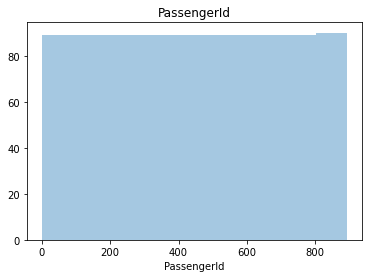

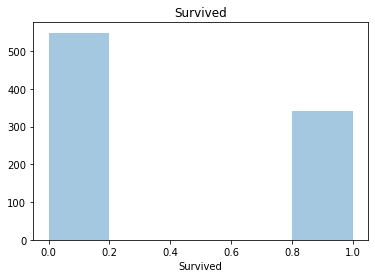

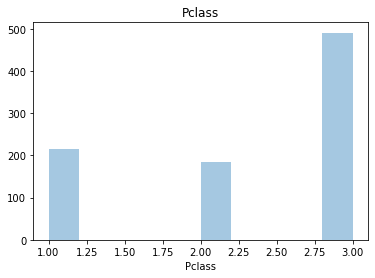

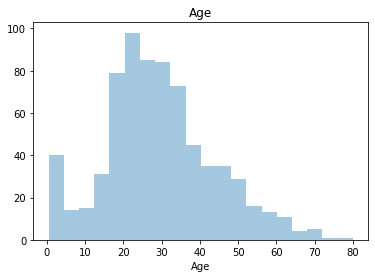

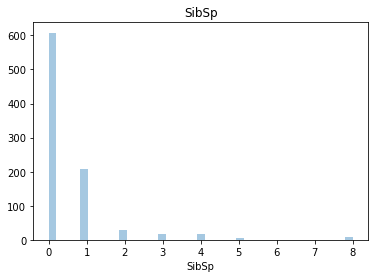

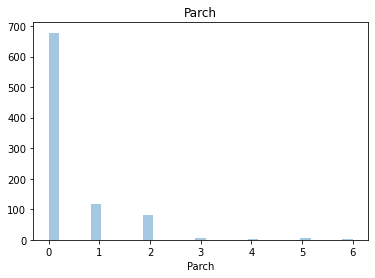

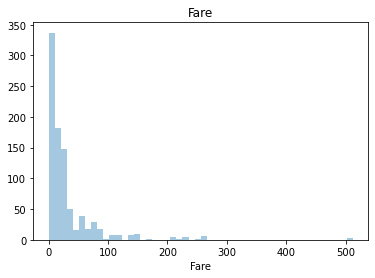

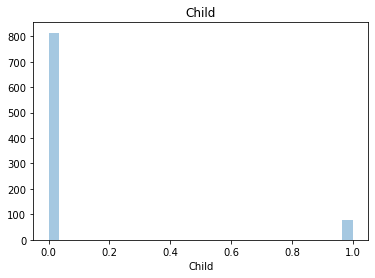

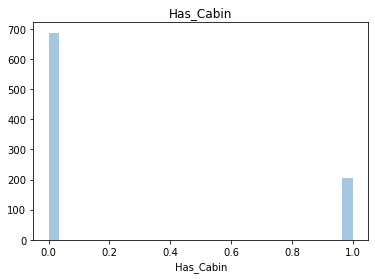

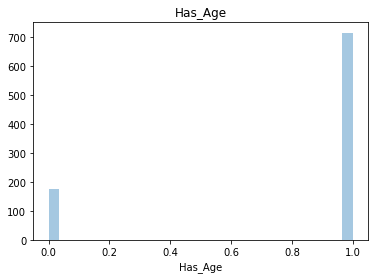

In [39]:
for x in train_data:
    if pd.api.types.is_numeric_dtype(train_data[x]):
        sns.distplot(train_data[x].dropna(),kde=False,norm_hist=False) 
        #Appears that norm_hist makes a density plot that can be over one, but the area under the curve sums to 1.
        plt.title(x)
        plt.show()
        plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

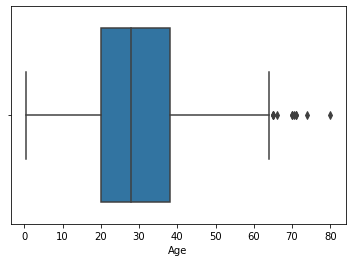

In [40]:
sns.boxplot(train_data['Age'])

I want to understand why the 0 bin seemingly has more people relative to what I would understand people aged to be at 0. Is this a lot of newborns?

In [41]:
train_data.loc[train_data['Age'] <= 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Has_Cabin,Title,Title_Cleaned,Has_Age
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,True,0,Master,Master,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,True,1,Miss,Miss,True
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,True,0,Master,Master,True
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,True,0,Miss,Miss,True
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,True,0,Miss,Miss,True
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,True,0,Master,Master,True
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,True,0,Master,Master,True
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,True,0,Miss,Miss,True
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,True,0,Master,Master,True
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q,True,0,Master,Master,True


I guess there were just a lot of children on this cruise

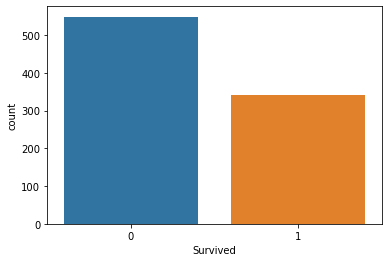

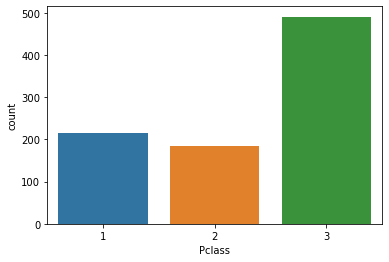

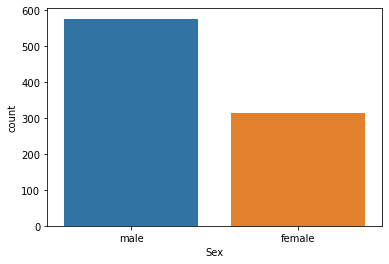

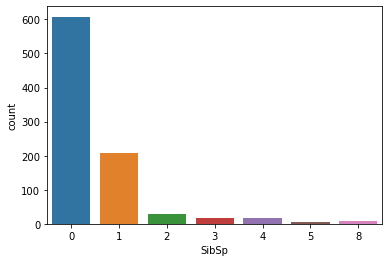

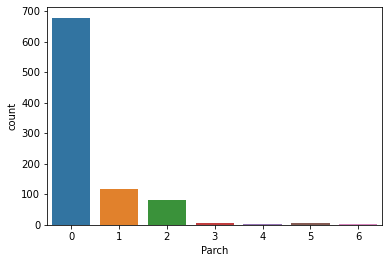

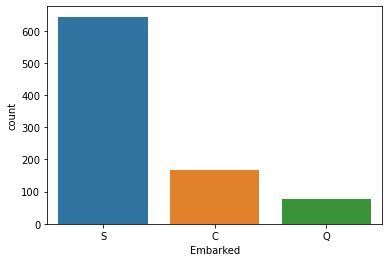

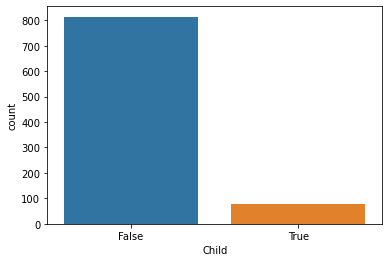

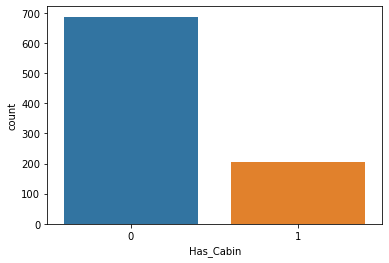

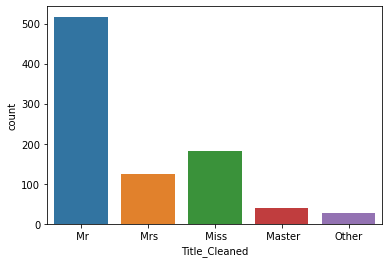

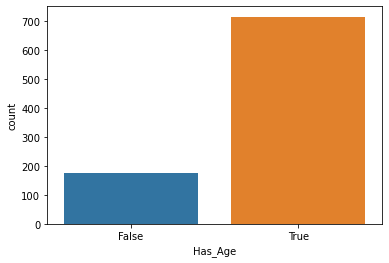

In [42]:
for var in ['Survived','Pclass','Sex','SibSp','Parch','Embarked','Child','Has_Cabin','Title_Cleaned','Has_Age']:
    sns.countplot(x=var,data=train_data)
    plt.show()
    plt.close()

The titles I think correspond to the number of each respective gender aboard the titanic.

## Multivariate analysis

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Has_Cabin,Title,Title_Cleaned,Has_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,0,Mr,Mr,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,1,Mrs,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0,Miss,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,1,Mrs,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0,Mr,Mr,True


<AxesSubplot:>

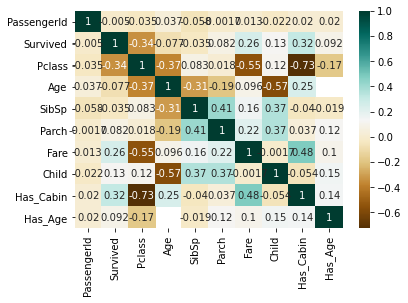

In [44]:
sns.heatmap(train_data.corr(),annot=True, cmap="BrBG")

It looks like there's significant negative correlation between Pclass and Has Cabin, which in this context means that the people that have cabins probably are higher class. 

It also seems like there's a pretty strong positive correlation between Fare and Has_Cabin, which means that the higher the fare, the more likely they are to have a cabin.

Age and Child are negatively correclated, which makes sense since I created Child as anyone under age 14. 

Fare and Pclass are negatively correlated, which means that the less you pay the more likely you are to be a lower social class. 

Interestingly, Survived has a decently high correlation with Pclass, Fare, and Has_Cabin. These variables are also highly correlated with each other, so I'm wondering if there will be a lot of collinearity introduced by having all 3 of these in the model. 

Also interestingly, it seems that Age has a moderately negative correlation between Pclass and SibSp. That means the younger you are, the more likely you are to be of a higher social class. Also, the older you are, the less likely you are to have siblings or spouses on the ship. (which makes sense, since younger children can have multiple siblings but older people are most likely to only have 1 spouse or no spouse.)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

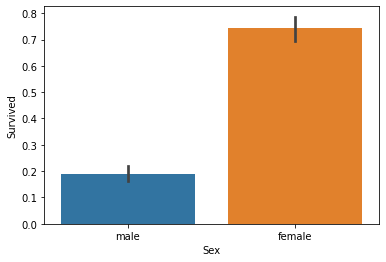

In [45]:
sns.barplot(x='Sex',y='Survived',data=train_data)

### Exploring the relationships in greater detail

<AxesSubplot:xlabel='Survived', ylabel='Age'>

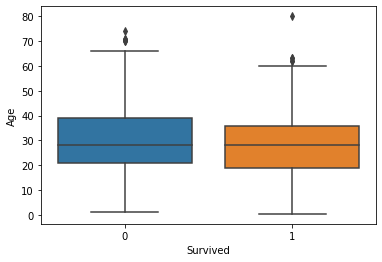

In [46]:
sns.boxplot(x=train_data['Survived'],y=train_data['Age'])

Surprisingly, the median age of the people that survived and that didn't are very similar. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

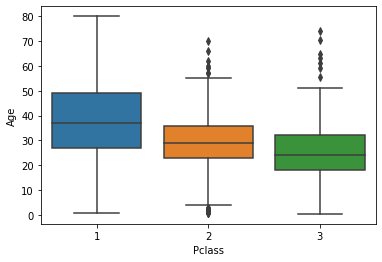

In [47]:
sns.boxplot(x=train_data['Pclass'],y=train_data['Age'])

It seems that the age gets lower as the social class gets lower. Meaning younger people tended to be middle or lower class. 

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

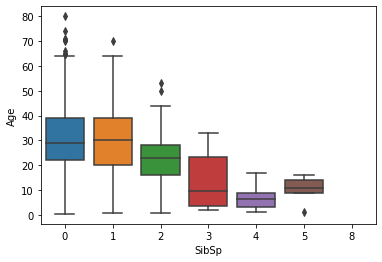

In [48]:
sns.boxplot(x=train_data['SibSp'],y=train_data['Age'])

## Scikit-learn stuff

In [ ]:
X_train, X_test, y_train, y_test